#### Student Depression Variable Imputation

**Name:** Manuel Ibañez Salazar


#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pathlib import Path
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

#### Read Dataset

In [ ]:

def load_and_validate_data(file_path):
    """
    Carga y valida el dataset con verificaciones exhaustivas
    
    Parámetros:
    -----------
    file_path : str
        Ruta del archivo CSV a cargar
        
    Retorna:
    --------
    DataFrame
        DataFrame validado con metadatos
    """
   
    if not Path(file_path).exists():
        raise FileNotFoundError(f"El archivo {file_path} no existe")
    
  
    try:
        df = pd.read_csv(file_path, engine='python')
    except Exception as e:
        raise ValueError(f"Error al leer el archivo: {str(e)}")
    
    
    required_columns = {'Age', 'Income', 'Gender', 'Registered', 'City'}
    if not required_columns.issubset(df.columns):
        missing = required_columns - set(df.columns)
        raise ValueError(f"Columnas faltantes: {missing}")
    
    
    meta = {
        'file_name': Path(file_path).name,
        'file_size_MB': Path(file_path).stat().st_size / (1024 * 1024),
        'num_rows': len(df),
        'num_columns': len(df.columns),
        'columns': list(df.columns),
        'dtypes': dict(df.dtypes),
        'missing_values': df.isna().sum().to_dict()
    }
    
    return df, meta

try:
    df_raw, metadata = load_and_validate_data('Synthetic_Data_Cleaning_example.csv')
    
    print(" Datos cargados exitosamente")
    print("\n Metadatos del dataset:")
    print(f"- Filas: {metadata['num_rows']}")
    print(f"- Columnas: {metadata['num_columns']}")
    print(f"- Tamaño: {metadata['file_size_MB']:.2f} MB")
    print("\n Primeras 3 filas:")
    display(df_raw.head(3))
    
    print("\n Tipos de datos:")
    display(pd.DataFrame.from_dict(metadata['dtypes'], 
                                 orient='index', 
                                 columns=['dtype']))
    
    print("\n Valores faltantes:")
    display(pd.DataFrame.from_dict(metadata['missing_values'], 
                                 orient='index', 
                                 columns=['missing_count']))
    
except Exception as e:
    print(f" Error: {str(e)}")
    df_raw = pd.DataFrame()
    metadata = {}

df = pd.read_csv('Synthetic_Data_Cleaning_example.csv')

print("Dimensiones del dataset:", df.shape)
display(df.head())
print("\nInformación del dataset:")
df.info()

 Datos cargados exitosamente

 Metadatos del dataset:
- Filas: 104
- Columnas: 5
- Tamaño: 0.01 MB

 Primeras 3 filas:


,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo



 Tipos de datos:


,dtype
Age,float64
Income,float64
Gender,object
Registered,float64
City,object



 Valores faltantes:


,missing_count
Age,1
Income,1
Gender,20
Registered,1
City,1


Dimensiones del dataset: (104, 5)


,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


#### Exploratory Data Analysis

In [8]:

print("Estadísticas descriptivas:")
display(df.describe(include='all'))


print("\nValores faltantes por columna:")
display(df.isnull().sum())

print("\nDistribución de género:")
display(df['Gender'].value_counts(dropna=False))

print("\nCiudades más comunes:")
display(df['City'].value_counts(dropna=False))

Estadísticas descriptivas:


,Age,Income,Gender,Registered,City
count,103.000000,103.000000,84,103.000000,103
unique,NaN,NaN,8,NaN,4
top,NaN,NaN,Male,NaN,New York
freq,NaN,NaN,12,NaN,27
mean,29.573987,51079.867179,NaN,0.504854,NaN
std,13.137300,21167.304578,NaN,0.502421,NaN
min,-5.000000,-1000.000000,NaN,0.000000,NaN
25%,23.988273,37726.305475,NaN,0.000000,NaN
50%,28.843517,51028.444622,NaN,1.000000,NaN
75%,34.967142,58315.989946,NaN,1.000000,NaN



Valores faltantes por columna:


Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64


Distribución de género:


Gender
NaN       20
Male      12
Female    11
MALE      11
FEMALE    10
male      10
female    10
femle     10
Femael    10
Name: count, dtype: int64


Ciudades más comunes:


City
New York    27
Berlin      26
Paris       25
Tokyo       25
NaN          1
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [9]:

print("Estadísticas descriptivas:")
display(df.describe(include='all'))


print("\nValores faltantes por columna:")
display(df.isnull().sum())

print("\nDistribución de género:")
display(df['Gender'].value_counts(dropna=False))

print("\nCiudades más comunes:")
display(df['City'].value_counts(dropna=False))

Estadísticas descriptivas:


,Age,Income,Gender,Registered,City
count,103.000000,103.000000,84,103.000000,103
unique,NaN,NaN,8,NaN,4
top,NaN,NaN,Male,NaN,New York
freq,NaN,NaN,12,NaN,27
mean,29.573987,51079.867179,NaN,0.504854,NaN
std,13.137300,21167.304578,NaN,0.502421,NaN
min,-5.000000,-1000.000000,NaN,0.000000,NaN
25%,23.988273,37726.305475,NaN,0.000000,NaN
50%,28.843517,51028.444622,NaN,1.000000,NaN
75%,34.967142,58315.989946,NaN,1.000000,NaN



Valores faltantes por columna:


Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64


Distribución de género:


Gender
NaN       20
Male      12
Female    11
MALE      11
FEMALE    10
male      10
female    10
femle     10
Femael    10
Name: count, dtype: int64


Ciudades más comunes:


City
New York    27
Berlin      26
Paris       25
Tokyo       25
NaN          1
Name: count, dtype: int64

### Visualizaciones (Cuarta Celda)

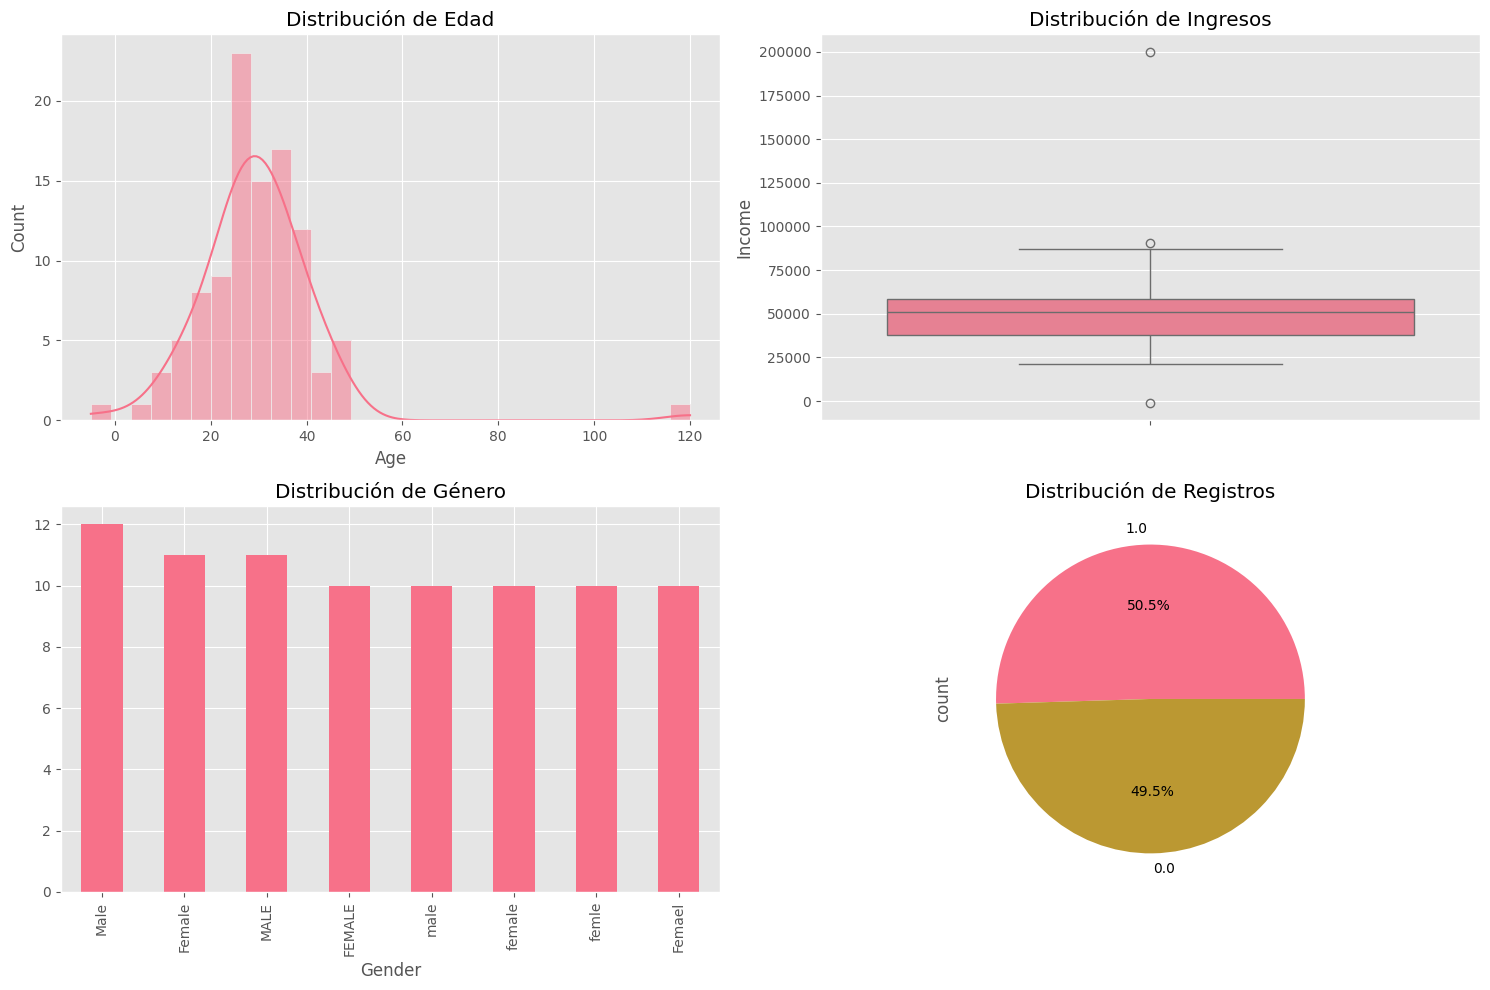

In [10]:

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribución de Edad')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Income'])
plt.title('Distribución de Ingresos')


plt.subplot(2, 2, 3)
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribución de Género')

plt.subplot(2, 2, 4)
df['Registered'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Registros')

plt.tight_layout()
plt.show()

#### Data Cleaning

In [11]:

df_clean = df.copy()


df_clean = df_clean.drop_duplicates()


gender_map = {
    'MALE': 'Male', 'male': 'Male',
    'FEMALE': 'Female', 'female': 'Female',
    'femle': 'Female', 'Femael': 'Female'
}
df_clean['Gender'] = df_clean['Gender'].replace(gender_map)

df_clean = df_clean[(df_clean['Age'] >= 0) & (df_clean['Age'] <= 100)]


df_clean = df_clean[(df_clean['Income'] >= 0) & (df_clean['Income'] <= 150000)]

df_clean['Registered'] = df_clean['Registered'].fillna(0).astype(int)

df_clean['City'] = df_clean['City'].fillna('Unknown')

print("Dimensión después de limpieza:", df_clean.shape)


Dimensión después de limpieza: (100, 5)


### Manejo de Valores Faltantes (Sexta Celda)

In [12]:

gender_dist = df_clean['Gender'].value_counts(normalize=True)
print("Distribución actual de género:\n", gender_dist)


random_gender = np.random.choice(['Male', 'Female'], 
                               p=gender_dist.values, 
                               size=df_clean['Gender'].isnull().sum())
df_clean.loc[df_clean['Gender'].isnull(), 'Gender'] = random_gender

print("\nValores faltantes después de imputación:")
display(df_clean.isnull().sum())

Distribución actual de género:
 Gender
Female    0.625
Male      0.375
Name: proportion, dtype: float64

Valores faltantes después de imputación:


Age           0
Income        0
Gender        0
Registered    0
City          0
dtype: int64

### 5. Variable Transformations (Transformaciones)

In [13]:

numeric_features = ['Age', 'Income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'City']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


X_transformed = preprocessor.fit_transform(df_clean)


cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
feature_names = numeric_features + list(cat_encoder.get_feature_names_out(categorical_features))

print("Forma de los datos transformados:", X_transformed.shape)
print("\nNombres de características:", feature_names)

Forma de los datos transformados: (100, 8)

Nombres de características: ['Age', 'Income', 'Gender_Female', 'Gender_Male', 'City_Berlin', 'City_New York', 'City_Paris', 'City_Tokyo']


### Creación de Nuevas Variables (Octava Celda)

In [14]:

bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '30-45', '45-60', '60+']
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)

income_threshold = df_clean['Income'].quantile(0.75)
df_clean['HighIncome'] = (df_clean['Income'] > income_threshold).astype(int)


display(df_clean[['Age', 'AgeGroup', 'Income', 'HighIncome']].sample(5))

,Age,AgeGroup,Income,HighIncome
39,31.968612,30-45,31537.035253,0
41,31.713683,30-45,69607.141314,1
79,10.124311,<18,90802.537499,1
48,33.436183,30-45,57829.123484,0
53,36.116763,30-45,53483.805457,0


In [15]:
df_clean.to_csv('cleaned_synthetic_data.csv', index=False)

#### Variable Tranformations
